In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4anUo3qcYdpwzvGx2QbJ")
project = rf.workspace("new-workspace-arg0t").project("pill-qvi6n")
version = project.version(8)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 26.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pill-8 in yolov8:: 100%|██████████| 600/600 [00:00<00:00, 11678.69it/s]


In [ ]:
# train.py 파일
!pip install ultralytics
from ultralytics import YOLO
# Roboflow 라이브러리를 사용하기 위해 추가할 수 있습니다.
# from roboflow import Roboflow

# 1. 기본 모델 준비
# ------------------
# 'yolov8n.pt'는 수많은 사물로 미리 학습된 '기본 두뇌'입니다.
# 우리는 이 모델을 기반으로 알약 식별을 가르칠 겁니다.
model = YOLO('yolov8n.pt')

# 2. Roboflow 데이터셋 다운로드
# ---------------------------
# 2단계에서 복사해 둔 코드 스니펫을 여기에 그대로 붙여넣으세요.
# 이 코드가 실행되면 Roboflow의 데이터가 현재 폴더로 다운로드됩니다.
# (아래는 예시이며, 실제로는 본인의 API 키가 포함된 코드를 사용해야 합니다.)

# from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR_API_KEY_HERE")
# project = rf.workspace("your-workspace").project("pill-project")
# dataset = project.version(1).download("yolov8")


# 3. 모델 학습 명령
# -----------------
# 다운로드된 데이터를 가지고 모델 학습을 시작합니다.
# data: 다운로드된 폴더 안의 'data.yaml' 파일 경로를 지정합니다.
#       보통 '프로젝트명-버전/data.yaml' 형태입니다.
# epochs: 전체 데이터를 총 몇 번 반복해서 공부할지 정합니다. (보통 100 이상)
# imgsz: 이미지 크기를 지정합니다. (보통 640)
try:
    results = model.train(data='Pill-8/data.yaml', epochs=100, imgsz=640)
except FileNotFoundError:
    print("\n[오류] 'data.yaml' 파일을 찾을 수 없습니다.")
    print("Roboflow 코드 스니펫이 올바르게 실행되었는지, 파일 경로가 정확한지 확인해주세요.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.200 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Pill-8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.

In [ ]:
# 기존 코드
# print("Top-1 Accuracy:", metrics.top1)
# print("Top-5 Accuracy:", metrics.top5)

# 수정 코드: 객체 탐지의 주요 성능 지표를 확인합니다.
results = metrics.results_dict

print(f"Precision: {results['metrics/precision(B)']:.4f}")
print(f"Recall: {results['metrics/recall(B)']:.4f}")
print(f"mAP@50: {results['metrics/mAP50(B)']:.4f}")
print(f"mAP@50-95: {results['metrics/mAP50-95(B)']:.4f}")

NameError: name 'metrics' is not defined

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4anUo3qcYdpwzvGx2QbJ")
project = rf.workspace("new-workspace-arg0t").project("pill_classify-7ljle")
version = project.version(1)
dataset = version.download("folder")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pill_classify-1 in folder:: 100%|██████████| 301/301 [00:00<00:00, 10740.90it/s]


In [ ]:
!pip install torch torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import os

# --- 1. 기본 설정 ---
# GPU 사용 설정 (가능하면 GPU 사용, 없으면 CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 👉 중요: Roboflow에서 Export한 데이터셋의 경로를 여기에 입력하세요.
data_dir = './Pill_classify-1/' # 예: './pills-v3-2/`

# 모델 학습을 위한 하이퍼파라미터
num_epochs = 25
batch_size = 32
learning_rate = 0.001

# --- 2. 데이터 전처리 및 로드 ---
# 학습 데이터는 이미지 증강(Augmentation)을 적용하여 모델 성능을 높입니다.
# 검증 데이터는 증강 없이 크기 조정과 정규화만 적용합니다.
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224), # 이미지 크기를 224x224로
        transforms.RandomHorizontalFlip(), # 좌우 반전
        transforms.ToTensor(), # PyTorch 텐서로 변환
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# ImageFolder를 사용하여 폴더 구조에서 데이터를 자동으로 로드합니다.
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4)
               for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
num_classes = len(class_names)

print(f"클래스 종류: {num_classes}, {class_names}")

# --- 3. 모델 정의 (사전 학습된 ResNet50 사용) ---
# ImageNet으로 사전 학습된 ResNet50 모델을 불러옵니다.
model = models.resnet50(weights='IMAGENET1K_V1')

# 마지막 분류 레이어(Fully Connected Layer)를 우리의 데이터셋에 맞게 수정합니다.
# 기존 ResNet50은 1000개의 클래스를 분류하므로, 마지막 레이어를 `num_classes`에 맞게 교체해야 합니다.
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# 모델을 설정한 장치(GPU 또는 CPU)로 보냅니다.
model = model.to(device)

# --- 4. 손실 함수와 옵티마이저 정의 ---
criterion = nn.CrossEntropyLoss() # 분류 문제이므로 CrossEntropyLoss 사용
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# --- 5. 모델 학습 ---
def train_model(model, criterion, optimizer, num_epochs=25):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # 각 에폭은 학습 단계와 검증 단계를 거칩니다.
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # 모델을 학습 모드로 설정
            else:
                model.eval()   # 모델을 평가 모드로 설정

            running_loss = 0.0
            running_corrects = 0

            # 데이터를 반복합니다.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # 옵티마이저의 그래디언트를 초기화합니다.
                optimizer.zero_grad()

                # 순전파 (Forward)
                # 학습 단계에서만 그래디언트를 계산합니다.
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # 학습 단계에서만 역전파 + 옵티마이저 실행
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # 통계
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    return model

# 학습 시작!
trained_model = train_model(model, criterion, optimizer, num_epochs=num_epochs)

# --- 6. 학습된 모델 저장 ---
save_path = 'resnet50_pill_classifier.pth'
torch.save(trained_model.state_dict(), save_path)
print(f"학습된 모델이 '{save_path}'에 저장되었습니다.")

Using device: cuda:0
클래스 종류: 3, ['00001', '00002', '00003']


This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 212MB/s]


Epoch 1/25
----------
train Loss: 0.3809 Acc: 0.8008
valid Loss: 0.0000 Acc: 1.0000
Epoch 2/25
----------
train Loss: 0.1238 Acc: 0.9323
valid Loss: 39.9038 Acc: 0.3333
Epoch 3/25
----------
train Loss: 0.1056 Acc: 0.9482
valid Loss: 0.3654 Acc: 0.7500
Epoch 4/25
----------
train Loss: 0.1001 Acc: 0.9562
valid Loss: 1.0002 Acc: 0.6667
Epoch 5/25
----------
train Loss: 0.0905 Acc: 0.9602
valid Loss: 0.2910 Acc: 0.7917
Epoch 6/25
----------
train Loss: 0.0420 Acc: 0.9721
valid Loss: 0.0295 Acc: 1.0000
Epoch 7/25
----------
train Loss: 0.0952 Acc: 0.9482
valid Loss: 67.7531 Acc: 0.3333
Epoch 8/25
----------
train Loss: 0.2791 Acc: 0.9124
valid Loss: 0.9246 Acc: 0.6667
Epoch 9/25
----------
train Loss: 0.2355 Acc: 0.9402
valid Loss: 105.4772 Acc: 0.3333
Epoch 10/25
----------
train Loss: 0.2266 Acc: 0.9163
valid Loss: 0.0002 Acc: 1.0000
Epoch 11/25
----------
train Loss: 0.1811 Acc: 0.9363
valid Loss: 0.0635 Acc: 1.0000
Epoch 12/25
----------
train Loss: 0.0967 Acc: 0.9721
valid Loss: 0.12


0: 352x640 1 00001_1, 1 00001_2, 1 00002_1, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)
탐지 결과:


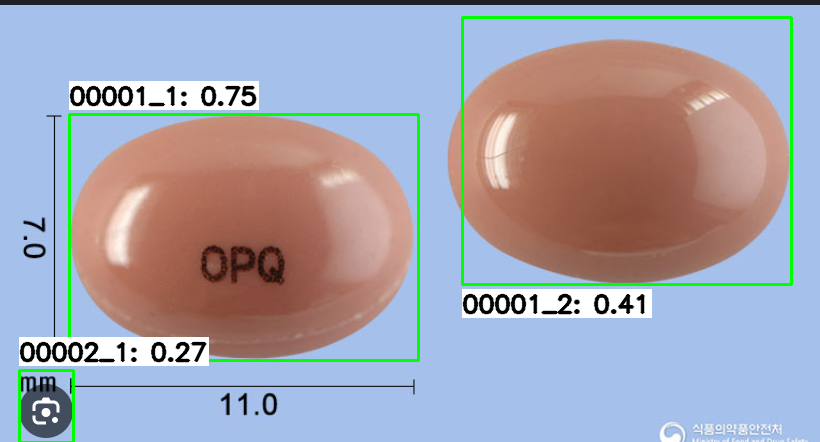

In [ ]:
# 이 코드를 실행하기 전에 필요한 라이브러리를 설치해주세요.

# 터미널(명령 프롬프트)에 다음 명령어를 입력하세요:

! pip install opencv-python Pillow



from ultralytics import YOLO

from PIL import Image

import cv2

import numpy as np

from google.colab.patches import cv2_imshow

# 1. YOLO 모델 로드

# ------------------

# 'yolov8n.pt'는 80개의 일반 사물(사람, 자동차 등)을 탐지하도록 사전 학습된 가장 작은 모델입니다.

# 직접 만든 알약 식별 모델을 사용하려면, Canvas 문서 3단계에서 생성된

# 'runs/train/exp/weights/best.pt' 파일 경로를 여기에 입력하세요.

# 예: model = YOLO('runs/train/exp/weights/best.pt')

try:

  model = YOLO('runs/detect/train/weights/best.pt')
  #model = YOLO('yolov8n.pt')

except Exception as e:

  print(f"오류: YOLO 모델 파일('yolov8n.pt')을 로드할 수 없습니다. 'ultralytics'가 올바르게 설치되었는지 확인하세요.")

  print("터미널에서 'pip install ultralytics'를 실행해주세요.")

  exit()



# 2. 분석할 이미지 열기

# ---------------------

# 객체를 탐지하고 싶은 이미지 파일의 경로를 입력하세요.

# 코드를 실행하는 폴더에 'sample.jpg'와 같은 이름으로 분석할 이미지를 준비해야 합니다.

try:

  image_path = 'sample2.png'

  img = Image.open(image_path)

except FileNotFoundError:

  print(f"오류: '{image_path}' 파일을 찾을 수 없습니다. 분석할 이미지를 같은 폴더에 준비해주세요.")

  exit()



# 3. 모델을 사용하여 객체 탐지 수행 (추론)

# --------------------------------------

# model() 함수에 이미지를 전달하면 탐지 결과를 리스트 형태로 반환합니다.

results = model(img)



# 4. 탐지 결과 시각화

# -------------------

# PIL 라이브러리로 연 이미지를 OpenCV 라이브러리에서 처리할 수 있는 형식(numpy 배열)으로 변환합니다.

frame = np.array(img)

# PIL은 색상 순서가 RGB이지만 OpenCV는 BGR이므로 변환해줍니다.

frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)



# 'results' 리스트에 담긴 각 탐지 결과(result)에 대해 반복합니다.

for result in results:
    boxes = result.boxes  # 결과에서 바운딩 박스 정보를 가져옵니다.

    # 찾아낸 각 바운딩 박스(box)에 대해 반복합니다.
    for box in boxes:
        # 정보 #1: 바운딩 박스의 좌표 (좌상단 x, y, 우하단 x, y)
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # 정보 #2: 탐지된 객체에 대한 신뢰도 점수 (0~1 사이)
        confidence = float(box.conf[0])

        # 정보 #3: 탐지된 객체의 클래스 ID와 이름
        cls_id = int(box.cls[0])
        class_name = model.names[cls_id]

        # 신뢰도가 50% (0.5) 이상인 경우에만 결과 표시
        if confidence > 0.1:
            # 바운딩 박스 그리기 (초록색 유지)
            cv2.rectangle(frame, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)

            # 사각형 위에 클래스 이름과 신뢰도 텍스트 표시
            label = f'{class_name}: {confidence:.2f}'

            # 폰트 설정
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.8 # 폰트 크기 키움 (원래 0.5)
            font_thickness = 2 # 폰트 두께 키움 (원래 2)

            # 텍스트 크기 계산
            (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)

            # 텍스트가 그려질 위치 (바운딩 박스 위쪽)
            # 텍스트가 이미지 위로 벗어나지 않도록 y 좌표 조정
            text_x = x1
            text_y = y1 - 10
            if text_y < text_height + 5: # 텍스트가 이미지 상단에 너무 붙거나 벗어날 경우
                text_y = y2 + text_height + 10 # 바운딩 박스 아래에 그리기

            # 배경 박스 그리기 (텍스트가 잘 보이도록 배경을 추가)
            # 흰색(255, 255, 255) 배경 박스, 반투명하게 하려면 cv2.addWeighted 사용 가능
            cv2.rectangle(frame, (text_x, text_y - text_height - 5),
                          (text_x + text_width, text_y + 5), (255, 255, 255), cv2.FILLED)

            # 텍스트 그리기 (검정색으로 변경하여 대비를 높임)
            cv2.putText(frame, label, (text_x, text_y), font, font_scale, (0, 0, 0), font_thickness, cv2.LINE_AA)

# 5. 결과 이미지 출력 (Colab용)
print("탐지 결과:")
cv2_imshow(frame)



탐지 및 분류 모델 로드 완료.

0: 352x640 2 00001s, 9.8ms
Speed: 2.3ms preprocess, 9.8ms inference, 3.6ms postprocess per image at shape (1, 3, 352, 640)
00001

0: 640x640 (no detections), 8.3ms
Speed: 3.1ms preprocess, 8.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
-> 경고: 탐지된 객체 #1에 대한 분류 결과를 얻지 못했습니다.
00001

0: 640x640 (no detections), 8.6ms
Speed: 3.0ms preprocess, 8.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
-> 경고: 탐지된 객체 #2에 대한 분류 결과를 얻지 못했습니다.

          ✍️  텍스트 기반 상세 분석 결과
탐지된 알약이 없습니다.

(결과 이미지를 닫으려면 아무 키나 누르세요)


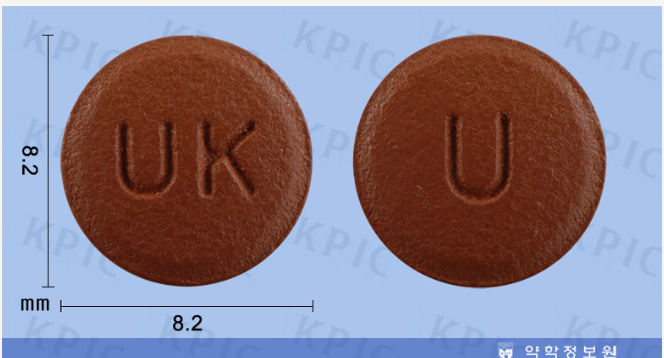

In [ ]:
# 필요한 라이브러리 설치
# !pip install ultralytics opencv-python Pillow

from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# --- 1. 교차 검증을 위한 데이터베이스 및 함수 (이전과 동일) --- #
PILL_DATABASE = {
    'Tylenol': {'shape': '원형', 'color': '흰색', 'imprint': 'TY500'},
    'Aspirin': {'shape': '원형', 'color': '흰색', 'imprint': 'ASPIRIN'},
    'Ibuprofen': {'shape': '타원형', 'color': '하얀색', 'imprint': 'IBU200'},
    'Vitamin C': {'shape': '원형', 'color': '노란색', 'imprint': 'VC1000'},
}

def analyze_pill_features(pill_image: np.ndarray) -> dict:
    # ... (이전과 동일) ...
    shape = '원형'
    color = '흰색'
    imprint = 'TY500'
    print(f"    [2차 검증] 이미지 특징 추출 완료 -> 모양:{shape}, 색:{color}, 각인:{imprint}")
    return {'shape': shape, 'color': color, 'imprint': imprint}

def compare_features_with_candidates(image_features: dict, yolo_top_candidates: list) -> (str, float, int):
    # ... (이전과 동일) ...
    best_match_name, best_match_score, max_matches = None, -1, -1
    for name, conf in yolo_top_candidates:
        db_features = PILL_DATABASE.get(name)
        if not db_features: continue
        matches = 0
        if image_features.get('shape') == db_features.get('shape'): matches += 1
        if image_features.get('color') == db_features.get('color'): matches += 1
        if image_features.get('imprint') and image_features.get('imprint') == db_features.get('imprint'): matches += 1
        if matches > max_matches or (matches == max_matches and conf > best_match_score):
            max_matches, best_match_name, best_match_score = matches, name, conf
    return best_match_name, best_match_score, max_matches

# --- 2. 모델 로드 (탐지 모델 + 분류 모델) --- #
try:
    # 1단계: 알약의 '위치'를 찾는 탐지 모델
    detection_model = YOLO('runs/detect/train/weights/best.pt')

    # 2단계: 알약의 '종류'를 판별하는 분류 모델
    # 이 모델은 잘라낸 알약 이미지를 학습시켜 따로 준비해야 합니다.
    # 예: classification_model = YOLO('pill_classifier.pt')
    # 아래는 임시로 탐지 모델을 그대로 사용하지만, 실제로는 분류 모델을 로드해야 합니다.
    classification_model = YOLO('runs/detect/train/weights/best.pt') # 임시 모델
    print("탐지 및 분류 모델 로드 완료.")

except Exception as e:
    print(f"오류: 모델 파일을 로드할 수 없습니다. 경로를 확인해주세요: {e}")
    exit()

# --- 3. 이미지 로드 및 준비 (이전과 동일) --- #
try:
    image_path = 'sample.png'
    img = Image.open(image_path)
except FileNotFoundError:
    print(f"오류: '{image_path}' 파일을 찾을 수 없습니다.")
    exit()

frame = np.array(img)

# PIL은 색상 순서가 RGB이지만 OpenCV는 BGR이므로 변환해줍니다.

frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

HIGH_CONFIDENCE_THRESHOLD = 0.95
LOW_CONFIDENCE_THRESHOLD = 0.80
CONFIDENCE_GAP_THRESHOLD = 0.10

detection_details = []

# --- 4. 메인 로직 (1단계: 탐지) --- #
detection_results = detection_model(img)

for result in detection_results:
    if len(result.boxes) == 0:
        continue

    for i, box in enumerate(result.boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # 1단계에서 얻은 1위 후보 정보 (참고용)
        top1_conf_detect = float(box.conf[0])
        top1_name_detect = detection_model.names[int(box.cls[0])]
        print(top1_name_detect)
        #if top1_conf_detect < 0.5: continue

        ### ★★★ 2단계: 분류 모델로 실제 Top-3 얻기 ★★★ ###

        # 1. 탐지된 영역의 이미지를 잘라냅니다.
        cropped_pill_img = frame[y1:y2, x1:x2]

        # 2. 잘라낸 이미지를 분류 모델에 넣어 Top-N 확률을 얻습니다.
        #    verbose=False 옵션으로 불필요한 로그 출력을 막습니다.
        classification_results = classification_model(cropped_pill_img, verbose=True)

        yolo_top_candidates = []
        # 분류 결과가 있는 경우에만 처리
        if classification_results[0].probs is not None:
            top_confs = classification_results[0].probs.top5conf.tolist()
            top_classes_ids = classification_results[0].probs.top5

            for j in range(min(3, len(top_confs))):
                candidate_name = classification_model.names[top_classes_ids[j]]
                candidate_conf = top_confs[j]
                yolo_top_candidates.append((candidate_name, candidate_conf))

        # 분류 결과가 없으면 이번 탐지는 건너뜀
        if not yolo_top_candidates:
            print(f"-> 경고: 탐지된 객체 #{i+1}에 대한 분류 결과를 얻지 못했습니다.")
            continue

        top1_name, top1_conf = yolo_top_candidates[0]

        # --- 최종 결정 로직 (이전과 동일한 로직을 실제 Top-3 데이터로 수행) --- #
        # ... (이전 코드와 거의 동일, 최종 결정 로직) ...
        final_label, box_color, decision_log = "", (0, 0, 255), ""

        if top1_conf >= HIGH_CONFIDENCE_THRESHOLD:
            decision_log, final_label, box_color = f"분류 모델 확신 ({top1_conf:.2f})", f'{top1_name}: {top1_conf:.2f}', (0, 255, 0)
        elif top1_conf < LOW_CONFIDENCE_THRESHOLD:
            decision_log, final_label, box_color = f"분류 모델 신뢰도 낮음 ({top1_conf:.2f})", f'{top1_name} (Low Conf.)', (0, 165, 255)
        else:
            if len(yolo_top_candidates) > 1:
                top2_conf = yolo_top_candidates[1][1]
                gap = top1_conf - top2_conf
                if gap < CONFIDENCE_GAP_THRESHOLD:
                    cropped_pill_cv2 = frame[y1:y2, x1:x2]
                    image_features = analyze_pill_features(cropped_pill_cv2)
                    best_match_name, _, max_matches = compare_features_with_candidates(image_features, yolo_top_candidates)
                    if best_match_name:
                        decision_log, final_label, box_color = f"교차 검증 완료 ({best_match_name}, {max_matches} 특징 일치)", f'{best_match_name} (Verified)', (255, 0, 0)
                    else:
                        decision_log, final_label, box_color = "교차 검증 실패", f'{top1_name} (Check Needed)', (0, 255, 255)
                else:
                    decision_log, final_label, box_color = f"분류 모델 신뢰 (격차 충분: {gap:.2f})", f'{top1_name}: {top1_conf:.2f}', (0, 255, 0)
            else:
                decision_log, final_label, box_color = f"분류 모델 신뢰 (단일 후보)", f'{top1_name}: {top1_conf:.2f}', (0, 255, 0)

        # ... (결과 그리기 및 텍스트 요약 저장) ...
        # ... (이전 코드와 동일) ...
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.rectangle(frame, (x1, y1), (x2, y2), color=box_color, thickness=2)
        (text_width, text_height), baseline = cv2.getTextSize(final_label, font, 0.8, 2)
        text_y = y1 - 10 if y1 - 10 > text_height else y2 + text_height + 10
        cv2.rectangle(frame, (x1, text_y - text_height - 5), (x1 + text_width, text_y + 5), box_color, cv2.FILLED)
        cv2.putText(frame, final_label, (x1, text_y), font, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
        detection_details.append({ "id": i + 1, "final_decision_log": decision_log, "final_pill_name": final_label.split(':')[0].strip() if ':' in final_label else final_label.split('(')[0].strip(), "yolo_top3_candidates": yolo_top_candidates })


# --- 5. 최종 결과 출력 (이전과 동일) --- #
# ... (결과 이미지 및 텍스트 요약 출력) ...

print("\n" + "="*50)
print("          ✍️  텍스트 기반 상세 분석 결과")
print("="*50)
if not detection_details: print("탐지된 알약이 없습니다.")
else:
    for detail in detection_details:
        print(f"\n--- 알약 #{detail['id']} ---")
        print(f" 최종 결정: {detail['final_pill_name']}")
        print(f" 결정 근거: {detail['final_decision_log']}")
        print(" 분류 모델 예측 Top 3 후보:")
        for i, (name, conf) in enumerate(detail['yolo_top3_candidates']):
            print(f"  {i+1}. {name} (신뢰도: {conf:.2f})")
print("\n(결과 이미지를 닫으려면 아무 키나 누르세요)")
cv2_imshow(frame)


In [ ]:
# 필요한 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50 # ResNet50 모델 임포트
from tensorflow.keras.applications.resnet50 import preprocess_input # ResNet50 전용 전처리기
import os

# --- 1. 설정값 정의 ---
DATASET_DIR = 'drive/MyDrive/Pill/dataset'
IMAGE_SIZE = (224, 224) # ResNet50은 보통 224x224 이미지를 사용합니다.
BATCH_SIZE = 32
EPOCHS = 15 # 전이학습은 더 적은 Epoch로도 충분히 학습됩니다.
LEARNING_RATE = 0.001 # 미세 조정을 위한 낮은 학습률

# --- 2. 데이터 준비 ---
def load_and_preprocess_data(data_dir):
    """
    폴더 구조를 기반으로 이미지 데이터셋을 불러오고 전이학습에 맞게 준비합니다.
    """
    if not os.path.exists(data_dir):
        print(f"오류: '{data_dir}' 폴더를 찾을 수 없습니다.")
        print("스크립트와 같은 경로에 'dataset' 폴더를 만들고,")
        print("그 안에 'circle', 'oval' 폴더를 만들어 이진화 이미지를 넣어주세요.")
        return None, None, None

    train_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='rgb'
    )

    val_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='rgb'
    )

    class_names = train_ds.class_names
    print(f"클래스 종류: {class_names}")

    # ★ 변경점: ResNet50 전용 전처리 함수 적용 ★
    # ResNet50이 학습된 방식 그대로 전처리합니다.
    train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
    val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))

    return train_ds, val_ds, class_names

# --- 3. AI 모델 설계 (전이학습) ---
def build_model(num_classes):
    """
    ResNet50을 기반으로 하는 전이학습 모델을 생성합니다.
    """
    # 1. 베이스 모델 로드 (ImageNet으로 사전 학습된 ResNet50)
    # include_top=False: 기존의 1000개짜리 분류기는 제외하고 특징 추출기 부분만 가져옴
    base_model = ResNet50(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                             include_top=False,
                             weights='imagenet')

    # 2. 베이스 모델의 가중치를 동결 (재학습 방지)
    # 기존의 지식은 그대로 사용하고, 우리가 추가하는 분류기만 학습시킴
    base_model.trainable = False

    # 3. 새로운 분류기(Classifier) 설계
    # 베이스 모델 위에 우리가 필요한 분류기를 쌓아 올림
    model = models.Sequential([
        base_model, # 특징 추출기
        layers.GlobalAveragePooling2D(), # 채널별 평균값 계산
        layers.Dropout(0.2), # 과적합 방지
        layers.Dense(num_classes, activation='softmax') # 최종 출력층 (원형, 타원형)
    ])

    # 4. 모델 컴파일
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    model.summary()
    return model

# --- 4. 메인 실행 로직 ---
if __name__ == '__main__':
    train_dataset, val_dataset, class_names = load_and_preprocess_data(DATASET_DIR)

    if train_dataset:
        num_classes = len(class_names)
        model = build_model(num_classes)

        print("\n=== 모델 학습을 시작합니다 (전이학습) ===")
        history = model.fit(
            train_dataset,
            validation_data=val_dataset,
            epochs=EPOCHS
        )
        print("=== 모델 학습 완료 ===")

        model.save('shape_model.h5')
        print("\n학습된 모델이 'shape_model.h5' 파일로 저장되었습니다.")



Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.
클래스 종류: ['circle', 'oval']
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)


=== 모델 학습을 시작합니다 (전이학습) ===
Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.5793 - loss: 0.9603 - val_accuracy: 0.5250 - val_loss: 0.7550
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.6530 - loss: 0.6750 - val_accuracy: 0.6000 - val_loss: 0.6053
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.7962 - loss: 0.4203 - val_accuracy: 0.7750 - val_loss: 0.4965
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.8212 - loss: 0.4171 - val_accuracy: 0.8000 - val_loss: 0.4471
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.8461 - loss: 0.3426 - val_accuracy: 0.8000 - val_loss: 0.4173
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.8562 - loss: 0.2858 - val_accuracy: 0.9000 - val_loss: 0.3633
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.8696 - loss: 0.2807 - val_accuracy: 0.9000 - val_loss: 0.3242
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 464ms/step - accuracy: 0.9002 - loss: 0.2406 - val_a

=== 모델 학습 완료 ===

학습된 모델이 'shape_model.h5' 파일로 저장되었습니다.


In [ ]:
# 모형 학습 모델 생성 코드
# 필요한 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2 # MobileNetV2 모델 임포트
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model # ★★★ 추가된 부분: 모델 로딩 함수 임포트 ★★★
import os

# --- 1. 설정값 정의 ---
DATASET_DIR = 'drive/MyDrive/Pill/dataset_1000'
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20 # 조기 종료를 사용하므로 조금 더 넉넉하게 설정
LEARNING_RATE = 0.001

# --- 2. 데이터 준비 ---
# ★★★ 대폭 수정된 부분: 데이터를 train, validation, test 세트로 분할 ★★★
def load_and_preprocess_data(data_dir):
    """
    폴더 구조를 기반으로 이미지 데이터셋을 불러오고,
    학습(80%), 검증(10%), 테스트(10%) 세트로 분할합니다.
    """
    if not os.path.exists(data_dir):
        print(f"오류: '{data_dir}' 폴더를 찾을 수 없습니다.")
        return None, None, None, None

    # 먼저 전체 데이터셋을 한번에 불러옵니다.
    full_dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        seed=123,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='rgb'
    )
    class_names = full_dataset.class_names
    print(f"클래스 종류: {class_names}")

    # 데이터셋 크기를 계산하여 분할 지점을 정합니다.
    dataset_size = tf.data.experimental.cardinality(full_dataset).numpy()
    train_size = int(dataset_size * 0.8)
    val_size = int(dataset_size * 0.1)
    test_size = dataset_size - train_size - val_size

    # 데이터셋 분할
    train_ds = full_dataset.take(train_size)
    remaining_ds = full_dataset.skip(train_size)
    val_ds = remaining_ds.take(val_size)
    test_ds = remaining_ds.skip(val_size)

    print(f"데이터셋 분할: 학습={len(train_ds)*BATCH_SIZE}개, 검증={len(val_ds)*BATCH_SIZE}개, 테스트={len(test_ds)*BATCH_SIZE}개 (대략적인 수치)")

    # ResNet50 전용 전처리 함수 적용
    def preprocess(x, y):
        return preprocess_input(x), y

    train_ds = train_ds.map(preprocess)
    val_ds = val_ds.map(preprocess)
    test_ds = test_ds.map(preprocess)

    return train_ds, val_ds, test_ds, class_names

# --- 3. AI 모델 설계 (MobileNetV2 전이학습 + 데이터 증강) ---
def build_model(num_classes):
    """
    MobileNetV2 기반 전이학습 모델을 생성하고, 데이터 증강 레이어를 추가합니다.
    """
    data_augmentation = models.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ], name="data_augmentation")

    base_model = MobileNetV2(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                             include_top=False, weights='imagenet')
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    x = data_augmentation(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    model.summary()
    return model

# --- 4. 메인 실행 로직 ---
if __name__ == '__main__':
    train_dataset, val_dataset, test_dataset, class_names = load_and_preprocess_data(DATASET_DIR)

    if train_dataset:
        num_classes = len(class_names)
        model = build_model(num_classes)

        early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
        model_checkpoint = ModelCheckpoint('best_shape_model.h5',
                                           monitor='val_accuracy',
                                           save_best_only=True,
                                           verbose=1)

        print("\n=== 모델 학습을 시작합니다 (전이학습) ===")
        history = model.fit(
            train_dataset,
            validation_data=val_dataset,
            epochs=EPOCHS,
            callbacks=[early_stopping, model_checkpoint]
        )
        print("=== 모델 학습 완료 ===")

        # ★★★ 추가된 부분: 학습 후 테스트 데이터로 최종 성능 평가 ★★★
        print("\n=== 최적 모델 성능 평가 (테스트 데이터) ===")
        # 가장 성능이 좋았던 모델을 불러와 평가
        best_model = load_model('best_shape_model.h5')
        test_loss, test_accuracy = best_model.evaluate(test_dataset)
        print(f"테스트 손실 (Test Loss): {test_loss:.4f}")
        print(f"테스트 정확도 (Test Accuracy): {test_accuracy:.2%}")

        # 최종 모델도 저장 (선택사항)
        model.save('final_shape_model.h5')
        print("\n학습된 모델이 'final_shape_model.h5'와 'best_shape_model.h5' 파일로 저장되었습니다.")



Found 2809 files belonging to 3 classes.
클래스 종류: ['circle', 'hexagon', 'oval']
데이터셋 분할: 학습=2240개, 검증=256개, 테스트=320개 (대략적인 수치)


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


=== 모델 학습을 시작합니다 (전이학습) ===
Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7683 - loss: 0.5177
Epoch 1: val_accuracy improved from -inf to 0.90625, saving model to best_shape_model.h5


70/70 ━━━━━━━━━━━━━━━━━━━━ 351s 5s/step - accuracy: 0.7700 - loss: 0.5142 - val_accuracy: 0.9062 - val_loss: 0.2118
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9597 - loss: 0.1041
Epoch 2: val_accuracy improved from 0.90625 to 0.99609, saving model to best_shape_model.h5


70/70 ━━━━━━━━━━━━━━━━━━━━ 64s 386ms/step - accuracy: 0.9597 - loss: 0.1040 - val_accuracy: 0.9961 - val_loss: 0.1000
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9777 - loss: 0.0660
Epoch 3: val_accuracy did not improve from 0.99609
70/70 ━━━━━━━━━━━━━━━━━━━━ 33s 277ms/step - accuracy: 0.9777 - loss: 0.0661 - val_accuracy: 0.9922 - val_loss: 0.1269
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9754 - loss: 0.0648
Epoch 4: val_accuracy improved from 0.99609 to 1.00000, saving model to best_shape_model.h5


70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 248ms/step - accuracy: 0.9755 - loss: 0.0648 - val_accuracy: 1.0000 - val_loss: 0.0864
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9771 - loss: 0.0581
Epoch 5: val_accuracy did not improve from 1.00000
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - accuracy: 0.9772 - loss: 0.0581 - val_accuracy: 1.0000 - val_loss: 0.0644
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9806 - loss: 0.0472
Epoch 6: val_accuracy did not improve from 1.00000
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.9806 - loss: 0.0472 - val_accuracy: 1.0000 - val_loss: 0.0678
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9871 - loss: 0.0377
Epoch 7: val_accuracy did not improve from 1.00000
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 277ms/step - accuracy: 0.9872 - loss: 0.0376 - val_accuracy: 0.9961 - val_loss: 0.1015
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9896 - loss: 0.0349
Epoch 8: val_accuracy did not i

10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 1.0000 - loss: 0.0703


테스트 손실 (Test Loss): 0.0708
테스트 정확도 (Test Accuracy): 100.00%

학습된 모델이 'final_shape_model.h5'와 'best_shape_model.h5' 파일로 저장되었습니다.
